<a href="https://colab.research.google.com/github/HVBLEGENDZZ9/BASICS-OF-DEEP-LEARNING/blob/main/Convolutional_Neural_Networks_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**GETTING OUR DATA**

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-10-26 14:07:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.114.128, 108.177.111.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.114.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   161MB/s    in 3.1s    

2021-10-26 14:07:59 (161 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
zr = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zr.extractall()
zr.close()

###**EXPLORING OUR DATA**

In [5]:
import os
for root,dir,files in os.walk("/content/10_food_classes_all_data"):
  print(f'THE DIRECTORY HAS {len(dir)} SUB DIRECTORIES AND {len(files)} FILES')

THE DIRECTORY HAS 2 SUB DIRECTORIES AND 0 FILES
THE DIRECTORY HAS 10 SUB DIRECTORIES AND 0 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 750 FILES
THE DIRECTORY HAS 10 SUB DIRECTORIES AND 0 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE DIRECTORY HAS 0 SUB DIRECTORIES AND 250 FILES
THE 

###**GETTING CLASS NAMES**

In [6]:
#programatically getting the class names
import pathlib
import numpy as np
dir  = pathlib.Path("/content/10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in dir.glob("*")]))
class_names = class_names.tolist()
print(class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


###**VISUALIZING OUR DATA**

IMAGE NAME: ['2720280.jpg']
(512, 512, 3)


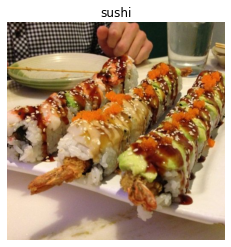

In [10]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_random_img(target_folder,class_names):
  import random
  target_class = random.choice(class_names)
  target = target_folder + '/' + target_class
  img = random.sample(os.listdir(target),1)
  print(f'IMAGE NAME: {img}')
  img = mpimg.imread(target + '/'+ img[0])
  print(img.shape)
  plt.title(target_class)
  plt.imshow(img)
  plt.axis("off")
  return img
img = plot_random_img("/content/10_food_classes_all_data/train",class_names)

###**CONVERTING DATA TO TENSORS**

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1/255.,
                           rotation_range=0.2,
                           zoom_range = 0.2,
                           shear_range = 0.2,
                           height_shift_range = 0.2,
                           width_shift_range=0.2,
                           horizontal_flip=True)
test = ImageDataGenerator(rescale=1/255.,
                          validation_split=0.2)
train_data = train.flow_from_directory("/content/10_food_classes_all_data/train", 
                                       target_size=(224,224),
                                       class_mode ="categorical",
                                       seed=42,)
validation_data = test.flow_from_directory("/content/10_food_classes_all_data/train", 
                                       target_size=(224,224),
                                       class_mode ="categorical",
                                       seed=42,
                                       subset="validation")
test_data = test.flow_from_directory("/content/10_food_classes_all_data/test", 
                                       target_size=(224,224),
                                       class_mode ="categorical",
                                       seed=42,
                                       subset="training")

Found 7500 images belonging to 10 classes.
Found 1500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


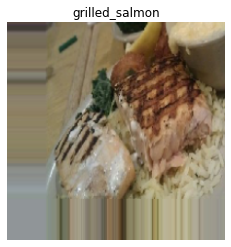

In [23]:
def visualizing_augumented_data(data,class_names):
  img,label = data.next()
  import random
  i = random.randint(0,len(img))
  plt.imshow(img[i])
  plt.title(class_names[label[i].argmax(axis=0)])
  plt.axis("off")
visualizing_augumented_data(train_data,class_names)

###**BUILDING TINY VCG CNN**

In [33]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  tf.keras.layers.Conv2D(10,3,input_shape=(224,224,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics = "accuracy")
history = model.fit(train_data,epochs=10,
                    steps_per_epoch=(len(train_data)),
                    validation_data=validation_data,
                    validation_steps = len(validation_data))

Epoch 1/10
235/235 [==============================] - 125s 521ms/step - loss: 2.2010 - accuracy: 0.1868 - val_loss: 2.0263 - val_accuracy: 0.2707
Epoch 2/10
235/235 [==============================] - 119s 507ms/step - loss: 2.0708 - accuracy: 0.2628 - val_loss: 1.9579 - val_accuracy: 0.3220
Epoch 3/10
235/235 [==============================] - 128s 546ms/step - loss: 1.9972 - accuracy: 0.2995 - val_loss: 1.9086 - val_accuracy: 0.3540
Epoch 4/10
235/235 [==============================] - 126s 537ms/step - loss: 1.9417 - accuracy: 0.3252 - val_loss: 1.8502 - val_accuracy: 0.3620
Epoch 5/10
235/235 [==============================] - 126s 538ms/step - loss: 1.8975 - accuracy: 0.3432 - val_loss: 1.8410 - val_accuracy: 0.3747
Epoch 6/10
235/235 [==============================] - 127s 541ms/step - loss: 1.8825 - accuracy: 0.3508 - val_loss: 1.7886 - val_accuracy: 0.3847
Epoch 7/10
235/235 [==============================] - 124s 528ms/step - loss: 1.8564 - accuracy: 0.3645 - val_loss: 1.7932 -

###**EVALUATING THE MODEL**

In [34]:
model.evaluate(test_data)

63/63 [==============================] - 10s 156ms/step - loss: 1.5845 - accuracy: 0.4685


[1.5845319032669067, 0.4684999883174896]

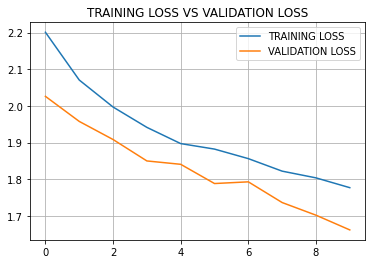

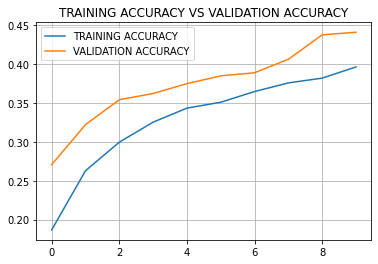

In [38]:
def plot_curves(history):
  train_loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  train_accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(train_loss))
  plt.plot(epochs,train_loss)
  plt.plot(epochs,val_loss)
  plt.grid(True)
  plt.title("TRAINING LOSS VS VALIDATION LOSS")
  plt.legend(["TRAINING LOSS","VALIDATION LOSS"])
  plt.figure()
  plt.plot(epochs,train_accuracy)
  plt.plot(epochs,val_accuracy)
  plt.grid(True)
  plt.title("TRAINING ACCURACY VS VALIDATION ACCURACY")
  plt.legend(["TRAINING ACCURACY","VALIDATION ACCURACY"]);
plot_curves(history)

###**VISUALIZING THE OUTPUTS OF OUR MODEL**

In [40]:
y = model.predict(test_data)
y.shape

(2000, 10)

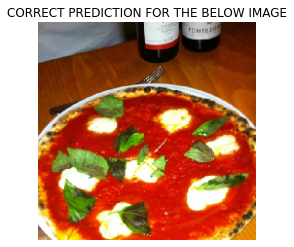

In [80]:
def plot_prediction(model,test,class_names):
  import random
  img,labels = test.next()
  i = random.randint(0,len(img)-1)
  y = model.predict(tf.expand_dims(img[i],axis=0))
  plt.imshow(img[i])
  plt.axis("off")
  if(class_names[int(y.argmax(axis=1))] == class_names[int(tf.expand_dims(labels[i],axis=0).numpy().argmax(axis=1))]):
    plt.title("CORRECT PREDICTION FOR THE BELOW IMAGE")
  else:
    plt.title("INCORRECT PREDICTION FOR THE BELOW IMAGE")
plot_prediction(model,test_data,class_names)